# Stock Analysis

In [39]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
plt.style.use('fivethirtyeight')

In [5]:
df1 = pd.read_csv('DJIA_data.csv',encoding='utf-8')
df2 = pd.read_csv('DJIA_news.csv',encoding='ISO-8859-1')

In [6]:
df1.head()

Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234

In [4]:
df2.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   
3                      b'Elephants extinct by 2020?'   
4  b'Bank analyst forecast Georgian crisis 2 days...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufac

In [8]:
dataframe = df2.merge(df1, on="Date")
dataframe.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   
2  b'All signs point to the US encouraging Georgi...   
3  b'Witness: Russian forces head towards Tbilisi...   
4   b'Taliban wages war on humanitarian aid workers'   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   
3  b' Quarter of Russians blame U.S. for conflict...   
4  b'Russia: World  "can forget about" Georgia\'s...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   
3  b'Georgian president  says US military will ta...   
4  b'Darfur rebels accuse Sudan of mounting major...   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is wh

In [11]:
headlines = []
for row in range(0, len(dataframe.index)):
    headlines.append(' '.join(str(x) for x in dataframe.iloc[row, 2:27]))
cleaned_headlines = []
for i in range(0, len(headlines)):
   cleaned_headlines.append(re.sub("b[(')]", "", headlines[i])) # remove b'
   cleaned_headlines[i] = re.sub('b[(")]', "", cleaned_headlines[i]) # remove b"
   cleaned_headlines[i] = re.sub("\'", '', cleaned_headlines[i]) # remove \'
dataframe["Headlines"] = cleaned_headlines
dataframe.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   
3  b' Quarter of Russians blame U.S. for conflict...   
4  b'Russia: World  "can forget about" Georgia\'s...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   
3  b'Georgian president  says US military will ta...   
4  b'Darfur rebels accuse Sudan of mounting major...   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   
3  b'2006: Nobel laureate Aleksander Solzhenitsyn...  11632.809570   
4  b'Philippines : Peace Advocate say Muslims nee...  11532.070312   

           High           Low         Close     Volume     Adj Close  \
0 

In [12]:
dataframe = dataframe[['Date', 'Label', 'Headlines', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]
dataframe.head()

Date  Label                                          Headlines  \
0  2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1  2008-08-11      1  Why wont America and Nato help us? If they won...   
2  2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3  2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4  2008-08-14      1  All the experts admit that we should legalise ...   

           Open          High           Low         Close     Volume  \
0  11432.089844  11759.959961  11388.040039  11734.320312  212830000   
1  11729.669922  11867.110352  11675.530273  11782.349609  183190000   
2  11781.700195  11782.349609  11601.519531  11642.469727  173590000   
3  11632.809570  11633.780273  11453.339844  11532.959961  182550000   
4  11532.070312  11718.280273  11450.889648  11615.929688  159790000   

      Adj Close  
0  11734.320312  
1  11782.349609  
2  11642.469727  
3  11532.959961  
4  11615.929688

In [55]:
def getPolarity(text):
    polarity =  TextBlob(text).sentiment.polarity
    return polarity

In [15]:
dataframe['Polarity'] = dataframe["Headlines"].apply(getPolarity)
dataframe.head()

Date  Label                                          Headlines  \
0  2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1  2008-08-11      1  Why wont America and Nato help us? If they won...   
2  2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3  2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4  2008-08-14      1  All the experts admit that we should legalise ...   

           Open          High           Low         Close     Volume  \
0  11432.089844  11759.959961  11388.040039  11734.320312  212830000   
1  11729.669922  11867.110352  11675.530273  11782.349609  183190000   
2  11781.700195  11782.349609  11601.519531  11642.469727  173590000   
3  11632.809570  11633.780273  11453.339844  11532.959961  182550000   
4  11532.070312  11718.280273  11450.889648  11615.929688  159790000   

      Adj Close  Polarity  
0  11734.320312 -0.048568  
1  11782.349609  0.121956  
2  11642.469727 -0.044302  
3  11532.959961  0.011398  
4  11615.929688  0.040677

In [17]:
dataframe = dataframe[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Polarity']]
dataframe.head()

Date          Open          High           Low         Close  \
0  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   
1  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
2  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
3  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
4  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   

      Volume     Adj Close  Polarity  
0  212830000  11734.320312 -0.048568  
1  183190000  11782.349609  0.121956  
2  173590000  11642.469727 -0.044302  
3  182550000  11532.959961  0.011398  
4  159790000  11615.929688  0.040677

In [18]:
dataframe.to_csv('modified_df.csv', index=False)

In [19]:
df = pd.read_csv('modified_df.csv', encoding='utf-8')
df.head()

Date          Open          High           Low         Close  \
0  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   
1  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
2  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
3  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
4  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   

      Volume     Adj Close  Polarity  
0  212830000  11734.320312 -0.048568  
1  183190000  11782.349609  0.121956  
2  173590000  11642.469727 -0.044302  
3  182550000  11532.959961  0.011398  
4  159790000  11615.929688  0.040677

In [20]:
POSITIVE_SENTIMENT_THRESHOLD = 0.05
NEGATIVE_SENTIMENT_THRESHOLD = -0.05
sentiments = []
for sentiment_score in df.Polarity:
    if sentiment_score >= POSITIVE_SENTIMENT_THRESHOLD:
        sentiments.append('Positive')
    elif sentiment_score <= NEGATIVE_SENTIMENT_THRESHOLD:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")
df['Sentiments'] = sentiments
df.head()

Date          Open          High           Low         Close  \
0  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   
1  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
2  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
3  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
4  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   

      Volume     Adj Close  Polarity Sentiments  
0  212830000  11734.320312 -0.048568    Neutral  
1  183190000  11782.349609  0.121956   Positive  
2  173590000  11642.469727 -0.044302    Neutral  
3  182550000  11532.959961  0.011398    Neutral  
4  159790000  11615.929688  0.040677    Neutral

In [21]:
df["Sentiments"].value_counts()

Neutral     1216
Positive     606
Negative     167
Name: Sentiments, dtype: int64

In [22]:
df["Price Difference"] = df["Adj Close"].diff()
df.dropna(inplace = True)
df

Date          Open          High           Low         Close  \
1     2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
2     2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
3     2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
4     2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
5     2008-08-15  11611.209961  11709.889648  11599.730469  11659.900391   
...          ...           ...           ...           ...           ...   
1984  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
1985  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
1986  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
1987  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
1988  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

         Volume     Adj Close  Polarity Sentiments  Price Difference  
1     183190000  11782.349609  0.121956   Positive         48.029297  
2     173590000  11642.469727 -0.044302    Neutral       -139.879882  
3     182550000  11532.959961  0.011398    Neutral       -109.509766  
4     159790000  11615.929688  0.040677    Neutral         82.969727  
5     215040000  11659.900391  0.047756    Neutral         43.970703  
...         ...           ...       ...        ...               ...  
1984  138740000  17140.240234 -0.014015    Neutral       -260.509766  
1985  112190000  17409.720703  0.046560    Neutral        269.480469  
1986  106380000  17694.679688  0.052622   Positive        284.958985  
1987  133030000  17929.990234  0.011243    Neutral        235.310546  
1988   82160000  17949.369141 -0.035458    Neutral         19.378907  

[1988 rows x 10 columns]

In [23]:
RISE = 1
FALL = 0
df['Stock Trend'] = np.where(df['Price Difference'] > 0, RISE, FALL)
df

Date          Open          High           Low         Close  \
1     2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
2     2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
3     2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
4     2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
5     2008-08-15  11611.209961  11709.889648  11599.730469  11659.900391   
...          ...           ...           ...           ...           ...   
1984  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
1985  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
1986  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
1987  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
1988  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

         Volume     Adj Close  Polarity Sentiments  Price Difference  \
1     183190000  11782.349609  0.121956   Positive         48.029297   
2     173590000  11642.469727 -0.044302    Neutral       -139.879882   
3     182550000  11532.959961  0.011398    Neutral       -109.509766   
4     159790000  11615.929688  0.040677    Neutral         82.969727   
5     215040000  11659.900391  0.047756    Neutral         43.970703   
...         ...           ...       ...        ...               ...   
1984  138740000  17140.240234 -0.014015    Neutral       -260.509766   
1985  112190000  17409.720703  0.046560    Neutral        269.480469   
1986  106380000  17694.679688  0.052622   Positive        284.958985   
1987  133030000  17929.990234  0.011243    Neutral        235.310546   
1988   82160000  17949.369141 -0.035458    Neutral         19.378907   

      Stock Trend  
1               1  
2               0  
3               0  
4               1  
5               1  
...           ...  
1984            0  
1985            1  
1986            1  
1987            1  
1988            1  

[1988 rows x 11 columns]

In [24]:
df = df[['Adj Close', 'Volume', 'Sentiments', 'Stock Trend']]
new_df = pd.get_dummies(df, columns=['Sentiments'])
new_df

Adj Close     Volume  Stock Trend  Sentiments_Negative  \
1     11782.349609  183190000            1                    0   
2     11642.469727  173590000            0                    0   
3     11532.959961  182550000            0                    0   
4     11615.929688  159790000            1                    0   
5     11659.900391  215040000            1                    0   
...            ...        ...          ...                  ...   
1984  17140.240234  138740000            0                    0   
1985  17409.720703  112190000            1                    0   
1986  17694.679688  106380000            1                    0   
1987  17929.990234  133030000            1                    0   
1988  17949.369141   82160000            1                    0   

      Sentiments_Neutral  Sentiments_Positive  
1                      0                    1  
2                      1                    0  
3                      1                    0  
4                      1                    0  
5                      1                    0  
...                  ...                  ...  
1984                   1                    0  
1985                   1                    0  
1986                   0                    1  
1987                   1                    0  
1988                   1                    0  

[1988 rows x 6 columns]

In [25]:
x = new_df.copy()
x.drop('Stock Trend', axis=1, inplace=True)
x

Adj Close     Volume  Sentiments_Negative  Sentiments_Neutral  \
1     11782.349609  183190000                    0                   0   
2     11642.469727  173590000                    0                   1   
3     11532.959961  182550000                    0                   1   
4     11615.929688  159790000                    0                   1   
5     11659.900391  215040000                    0                   1   
...            ...        ...                  ...                 ...   
1984  17140.240234  138740000                    0                   1   
1985  17409.720703  112190000                    0                   1   
1986  17694.679688  106380000                    0                   0   
1987  17929.990234  133030000                    0                   1   
1988  17949.369141   82160000                    0                   1   

      Sentiments_Positive  
1                       1  
2                       0  
3                       0  
4                       0  
5                       0  
...                   ...  
1984                    0  
1985                    0  
1986                    1  
1987                    0  
1988                    0  

[1988 rows x 5 columns]

In [27]:
y = new_df['Stock Trend'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
x_scaler = scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
#x_test_scaled

array([[ 1.13151744,  5.17053026, -0.31072773,  0.79948437, -0.65759595],
       [ 1.07203468, -0.62384538, -0.31072773, -1.25080619,  1.52069063],
       [ 0.35151141, -0.05818918, -0.31072773,  0.79948437, -0.65759595],
       ...,
       [-0.15491372, -0.25339891, -0.31072773, -1.25080619,  1.52069063],
       [ 1.47607382, -0.95098198, -0.31072773, -1.25080619,  1.52069063],
       [-1.56669148,  2.0848079 , -0.31072773,  0.79948437, -0.65759595]])

In [30]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(x_train_scaled, y_train)

C:\Users\jayan\AppData\Local\Temp\ipykernel_4864\283714181.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_scaled, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [36]:
predictions = rf.predict(x_test_scaled)
matrix = confusion_matrix(y_test, predictions)
print(matrix)
score = accuracy_score(y_test, predictions)
print(score)
report = classification_report(y_test, predictions)
print(report)

[[ 92 106]
 [ 79 121]]
0.535175879396985
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       198
           1       0.53      0.60      0.57       200

    accuracy                           0.54       398
   macro avg       0.54      0.53      0.53       398
weighted avg       0.54      0.54      0.53       398



# Visualization

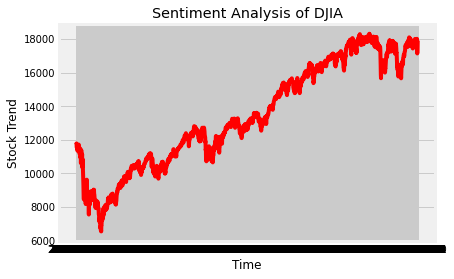

In [56]:
plt.plot(dataframe["Date"], dataframe[["Adj Close"]], color = 'red')
plt.xlabel('Time')
plt.ylabel('Stock Trend')
plt.title('Sentiment Analysis of DJIA')
plt.show()